<a href="https://colab.research.google.com/github/JoaoMarcelo99/data_science_portifolio/blob/master/Modelo_Desafio_AEVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador de Autores da Literatura Brasileira (1840 - 1908)

---

> Uma breve introdução...

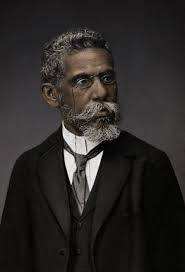



O Brasil possui em sua história diversos autores renomados responsáveis por criar narrativas e personagens cativantes. Pensando em como esses autores escrevem, decidi utilizar seus textos para ver se é possivel encontrar semelhanças entre eles, seus termos mais frequentes e, quem sabe até descobri o autor a partir de um pedaço de seu texto.

O conjunto de dados que iremos utilizar conta com 81 livros e contos selecionados de diferentes autores brasileiros, sendo eles: Adolfo Caminha, Aluísio Azevedo, Bernardo Guimarães, Joaquim Manuel de Macedo, José Alencar, Machado de Assis e Manuel Antonio de Almeida.

Esse conjunto de dados pode ser encontrado na seguinte página do Kaggle: https://www.kaggle.com/rtatman/brazilian-portuguese-literature-corpus

O código original desse notebook pode ser encontrado em: https://github.com/rafael-carvalho/brazilian-literature/blob/master/Rafa_Literatura_Brasileira_.ipynb

---





> Realizando o upload dos livros

Uma das maneiras mais fáceis de carregar algum arquivo para o Google Colab é utilizando o comando 

```
from google.colab import files
files.upload()
```
Que assim que for executada, esta célula de código abrirá uma janela para enviar o arquivo para o ambiente do Google Colab (este que estamos utilizando) caso possua em seu computador.




In [62]:
from google.colab import files
files.upload()

{}

Após realizarmos o upload devemos extrair os arquivos.

In [63]:
from zipfile import ZipFile

Nome_Arquivo = 'archive.zip'

with ZipFile(Nome_Arquivo, 'r') as zip_:
  print("Extraindo arquivos...")
  zip_.extractall()
  print('Concluido')

Extraindo arquivos...
Concluido


E pronto. Depois desse processo todo podemos finalmente dar ínicio ao nosso tratamento dos dados.



> Limpeza e Tratamento dos Dados

Dando uma rápida olhada nos nossos livros é possivel perceber que eles possuem algumas palavras que não são muito interessantes para nós e que podem acabar atrapalhando as nossas análises.

Por sorte, a biblioteca NLTK disponibiliza uma lista com as palavras mais comuns que não agregam informações ao texto. Essa lista é conhecida como 'Stopwords'.

Sabendo que no nosso caso algumas informações podem ser irrelevantes, nós criaremos outra lista chamada 'novas_stop_words' já que assim poderemos mexer e acresentar termos sem nos preocuparmos de adulterar a lista original


In [64]:
import pandas as pd
import numpy as np
import gensim
import nltk
import glob

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

novas_stop_words = list(stopwords.words('portuguese'))
novas_stop_words.append('www.nead.unama.br')
novas_stop_words.append('nead')
novas_stop_words.append('universidade')
novas_stop_words.append('cep')
novas_stop_words.append('universidade')
novas_stop_words.append('cep')
novas_stop_words.append('email')
novas_stop_words.append('fones')
novas_stop_words.append('pará')
novas_stop_words.append('uvb')
novas_stop_words.append('unamabr')
novas_stop_words.append('unama')
novas_stop_words.append('www')
novas_stop_words.append('br')
novas_stop_words.append('amazônia')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Agora iremos finalmente colocar a mão na massa. Dentro da pasta que extraímos é possível encontrar todas as obras disponíveis e algumas pastas que dividem as obras pelos seus autores. Nós leremos cada pasta e cada livro enquanto separamos o conteúdo dele em uma série de sequências de cada termo. Faremos isso para ter a maior quantidade possível de amostras de texto separadas por seus autores.

In [65]:
data = list()
for pasta in glob.iglob(r'/content/Brazilian_Portugese_Corpus/*/'):
  for livro in glob.iglob(pasta + '*.txt'):
    print('Lendo livro: ',livro.replace('/content/Brazilian_Portugese_Corpus/',"").replace('/'," - ").replace('.txt',""))
    with open(livro, 'rt', encoding= 'ISO8859_1') as arquivo:
      linhas = arquivo.readlines()
      
      todas_linhas = []
      for linha in linhas:
        linha_tratada = gensim.utils.simple_preprocess(linha)
        linha_tratada = [i for i in linha_tratada if i not in novas_stop_words]
        linha_tratada = list(filter(None, linha_tratada))
        todas_linhas.append(linha_tratada)
      
      todas_linhas = list(filter(None,todas_linhas))
      grupos = []
      grupo = []

      for i in todas_linhas:
        grupo.append(i)
        if len(grupo) == 10:
          grupos.append(" ".join(k) for k in grupo)
          grupo = []
      
      conteudos = []
      for i in grupos:
        conteudos.append(' '.join(i).strip())

      for conteudo in conteudos:
        data.append({
            'Autor' : pasta.replace('/content/Brazilian_Portugese_Corpus/',"").replace('/',""),
            'Livro' : livro.replace(pasta,"").replace('.txt',""),
            'Conteudo': conteudo
        })

Lendo livro:  Manuel Antonio de Almeida - Memorias de um Sargento de Milicias
Lendo livro:  Machado de Assis - Historias Sem Data
Lendo livro:  Machado de Assis - Varias Historias
Lendo livro:  Machado de Assis - Historias da Meia-Noite
Lendo livro:  Machado de Assis - Ressurreicao
Lendo livro:  Machado de Assis - Paginas Recolhidas
Lendo livro:  Machado de Assis - Helena
Lendo livro:  Machado de Assis - Reliquias de Casa Velha
Lendo livro:  Machado de Assis - Quincas Borba
Lendo livro:  Machado de Assis - A Mao e a Luva
Lendo livro:  Machado de Assis - Memorial de Aires
Lendo livro:  Machado de Assis - Contos Fluminenses
Lendo livro:  Machado de Assis - Casa Velha
Lendo livro:  Machado de Assis - Memorias Postumas de Bras Cubas
Lendo livro:  Machado de Assis - Esau e Jaco
Lendo livro:  Machado de Assis - Iaia Garcia
Lendo livro:  Machado de Assis - Dom Casmurro
Lendo livro:  Machado de Assis - Papeis Avulsos
Lendo livro:  Joaquim Manuel de Macedo - Antonica da Silva
Lendo livro:  Joaq

E com isso podemos ver a tabela que criamos...

In [66]:
df = pd.DataFrame(data)
df.head(10)

,Autor,Livro,Conteudo
0,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,tomo ministério cultura fundação biblioteca na...
1,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,quatro esquinas formam ruas ouvidor quitanda c...
2,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,daí influência moral ainda outra influência ju...
3,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,armado colocado sob importância vantajosa dest...
4,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,mão estendida ninguém passava deixado óbolo po...
5,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,chamavam assim rotunda gordíssima personagem c...
6,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,alcançou emprego vemos empossado exercia disse...
7,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,vez pouco fortes dia seguinte dois amantes tão...
8,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,comadre queriam barbeiro defronte afinal adota...
9,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,afilhadinho deitado colo maria acompanhava cad...


Aqui vemos um total de 33514 amostras de texto separadas entre o autor, seu livro e o conteúdo da amostra.

In [67]:
df.shape

(33514, 3)

Para deixar os autores mais fáceis para serem reconhecidos pelo algorítmo que vamos utilizar, iremos criar uma variável que funcionará como uma ID dos autores. Essa ID será um número único para cada autor e poderemos nos referenciar a eles assim.

In [68]:
id = dict()
for i, x in enumerate(df['Autor'].unique()):
  id[x] = i
print(id)
df['Autor_ID'] = df['Autor'].map(id)

{'Manuel Antonio de Almeida': 0, 'Machado de Assis': 1, 'Joaquim Manuel de Macedo': 2, 'Aluisio Azevedo': 3, 'Jose de Alencar': 4, 'Adolfo Caminha': 5, 'Bernardo Guimaraes': 6}


In [69]:
df.head()

,Autor,Livro,Conteudo,Autor_ID
0,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,tomo ministério cultura fundação biblioteca na...,0
1,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,quatro esquinas formam ruas ouvidor quitanda c...,0
2,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,daí influência moral ainda outra influência ju...,0
3,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,armado colocado sob importância vantajosa dest...,0
4,Manuel Antonio de Almeida,Memorias de um Sargento de Milicias,mão estendida ninguém passava deixado óbolo po...,0


Vamos ver como está distribuída a quantidade de amostras que nós temos por autor.

[]

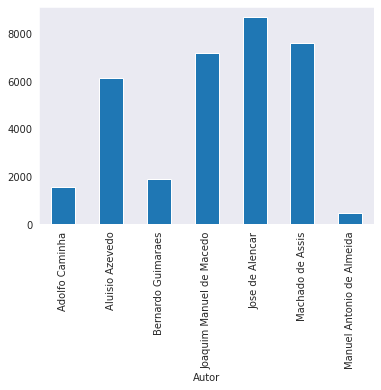

In [70]:
import matplotlib.pyplot as plt

top_dist = df.groupby('Autor').size()
top_dist.rename(df['Autor'])
top_dist.plot(kind= "bar")
plt.plot(figsize= (10,8))


Aqui podemos ver que José de Alencar lidera a lista de amostras nos nossos dados, seguido por Machado de Assis e Joaquim Manuel de Macedo. É possível ver que Manuel Antonio de Almedia possui menos amostras que os demais. Isso tem muita influência da quantidade de livros disponíveis nos nossos dados. Pegando o Manuel Antonio de Almeida como exemplo, ele só possui um livro no nosso conjunto, constratando com os mais de 20 de José de Alencar. Isso explica o porquê dele estar com tão poucas aparições.



>Quais os termos mais frequentes?

É nítido que cada um desses autores possui uma escrita única e que faz com que ele repita alguns termos. Será que a partir dos termos mais citados em suas obras conseguimos chegar a alguma conclusão sobre suas escritas?

Bem, o primeiro passo que iremos fazer é gerar uma nuvem de palavras para encontrarmos os termos mais citados por cada autor.

Para isso, iremos criar novas tabelas que contam com todos os termos citados pelos autores em todas as suas amostras.



 Manuel Antonio de Almeida
[('leonardo', 401), ('maria', 259), ('comadre', 212), ('porém', 210), ('tempo', 206), ('casa', 194), ('tudo', 193), ('major', 179), ('tomo', 158), ('havia', 158)] 



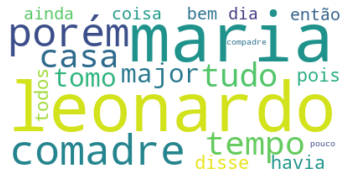


 Machado de Assis
[('disse', 2744), ('casa', 2010), ('tudo', 1823), ('olhos', 1772), ('nada', 1694), ('ainda', 1677), ('ser', 1647), ('tempo', 1642), ('outra', 1505), ('outro', 1483)] 



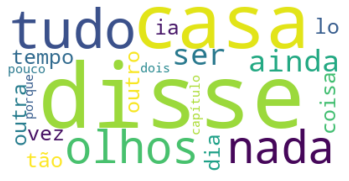


 Joaquim Manuel de Macedo
[('ainda', 2018), ('disse', 1708), ('senhor', 1492), ('amor', 1411), ('porque', 1390), ('senhora', 1388), ('bem', 1385), ('casa', 1327), ('pois', 1290), ('homem', 1218)] 



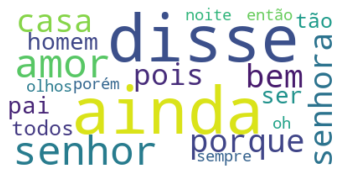


 Aluisio Azevedo
[('casa', 1719), ('tudo', 1514), ('ainda', 1441), ('bem', 1411), ('então', 1312), ('mulher', 1291), ('homem', 1278), ('disse', 1219), ('porque', 1180), ('todos', 1180)] 



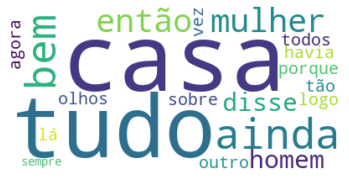


 Jose de Alencar
[('ainda', 2116), ('sobre', 1750), ('disse', 1638), ('casa', 1608), ('tempo', 1563), ('onde', 1542), ('bem', 1494), ('então', 1472), ('tão', 1439), ('olhos', 1433)] 



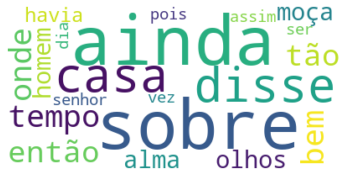


 Adolfo Caminha
[('bom', 359), ('homem', 327), ('olhos', 310), ('maria', 308), ('bem', 305), ('adelaide', 281), ('evaristo', 269), ('dia', 267), ('mulher', 265), ('grande', 259)] 



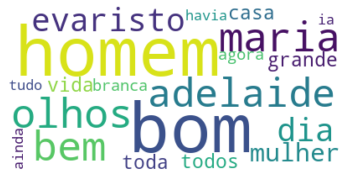


 Bernardo Guimaraes
[('bem', 673), ('senhor', 569), ('ainda', 554), ('tão', 547), ('coração', 498), ('tempo', 420), ('assim', 406), ('casa', 399), ('sobre', 397), ('pai', 379)] 



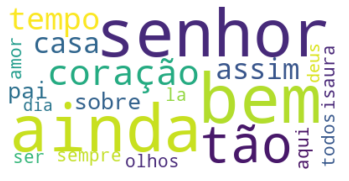

In [71]:
from PIL import Image
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

for autor in df.Autor.unique():
  Y = df[df['Autor'] == autor]
  
  Todas_Palavras_Autor = [i.split() for i in Y['Conteudo']]
  Todas_Palavras_Autor = " ".join([" ".join(i) for i in Todas_Palavras_Autor]).split()
  c = Counter(np.array(Todas_Palavras_Autor).T)
  
  X = pd.DataFrame(c.most_common(20), columns= ['Palavras',"frequencia"])
  wordcloud1 = WordCloud(max_words=20, background_color = 'white').generate(str(X['Palavras']))

  print("\n",autor)
  print(c.most_common(10),'\n')
  plt.imshow(wordcloud1, interpolation='bilinear')
  plt.axis('off')
  plt.show()


É... Não parece que ficou tão bom assim...

O grande problema com a nuvem de palavras é que ela não entrega bastante informações acerca de qual termo é o mais citado, ou a diferença entre eles.

Será que conseguimos fazer melhor?

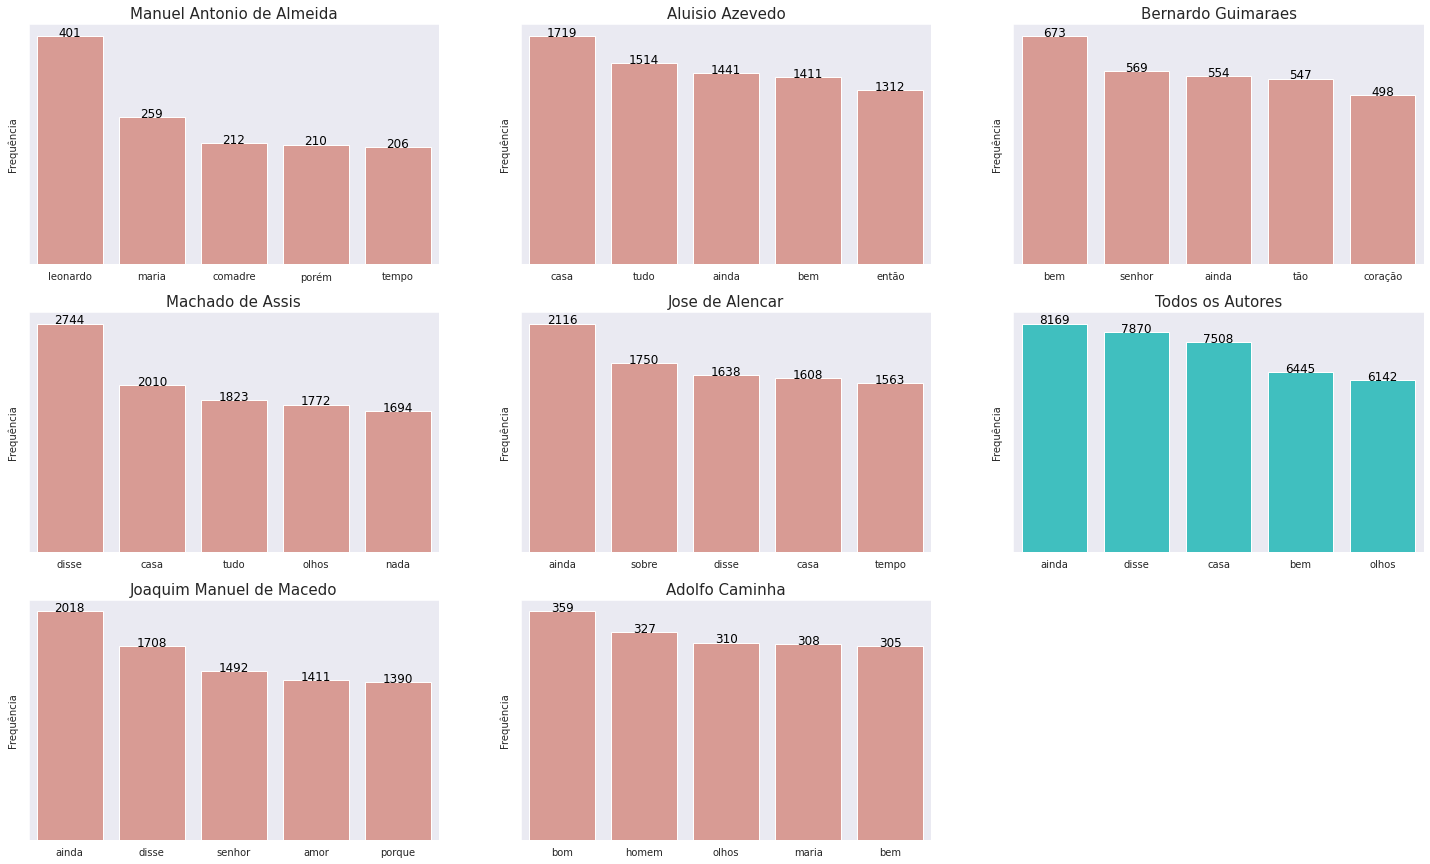

In [72]:
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(3,3, figsize = (25,15))
sns.set_style('dark')
i = 0 
j = 0

for autor in df['Autor'].unique():

  X = df[df['Autor'] == autor]
  Todas_Palavras_Autor = [i.split() for i in X['Conteudo']]
  Todas_Palavras_Autor = " ".join([" ".join(i) for i in Todas_Palavras_Autor]).split()
  c = Counter(Todas_Palavras_Autor)
  termos = pd.DataFrame(c.most_common(5), columns= ['Termo', 'Frequência'])

  grafico = sns.barplot(x = 'Termo', y ='Frequência',data= termos, ax = ax[i,j],
                 color= 'salmon', saturation= 0.5, estimator = min)
  
  grafico.set_title(autor, fontdict= {'fontsize': 15})
  grafico.set_aspect('auto')
  grafico.set_in_layout(True)
  grafico.set_xlabel('')
  grafico.set_yticklabels('')

  for indice, linha in termos.iterrows():
    grafico.text(linha.name, linha.Frequência, round(linha.Frequência,2),
           color='black', ha="center",fontdict={'fontsize': 12})

  i += 1
  if i == 3:
    i = 0
    j += 1
    if j == 3:
      j = 0 

Todas_Palavras_Autor = [i.split() for i in df['Conteudo']]
Todas_Palavras_Autor = " ".join([" ".join(i) for i in Todas_Palavras_Autor]).split()
c = Counter(Todas_Palavras_Autor)
termos = pd.DataFrame(c.most_common(5), columns= ['Termo', 'Frequência'])

grafico = sns.barplot(x = 'Termo', y ='Frequência',data= termos, ax = ax[i,j],
                 color= 'cyan', saturation= 0.5, estimator = min)

grafico.set_title('Todos os Autores', fontdict= {'fontsize': 15})
grafico.set_xlabel('')
grafico.set_yticklabels('')
grafico.set_autoscaley_on(True)

for indice, linha in termos.iterrows():
    grafico.text(linha.name,linha.Frequência, round(linha.Frequência,2), color='black', ha="center",fontdict={'fontsize': 12})

fig.delaxes(ax[2,2])

Bem melhor!

Com esses gráficos fica mais fácil ver quais são os termos que os autores mais utilizavam em suas obras. Começando pelo Manuel Antonio de Almeida, ele possui apenas um livro nos nossos dados, e é visível que o nome 'Leonardo' é citado muitas vezes em relação aos outros termos. Isso nos leva a crer que provavelmente o Leonardo é o protagonista de 'Memorias de um Sargento de Milícias'.

Partindo para o Aluísio Azevedo, é possível ver que ele utiliza muito o termo 'casa'. Possivelmente ele escreve com mais enfoque na descrição do cenário ou suas histórias costumam se passar em locais mais fechados e pessoais.

O Bernardo Guimarães utiliza bastante a palavra 'bem' o que indica que ele coloca intensidade em seus discursos e além de provavelmente se referir assim a seus personagems (seja o narrador ou um outro personagem) como pessoas boas (ou 'de bem').

Machado de Assis por sua vez usa a palavra 'disse' o que demonstra que o diálogo é uma peça central de suas obras, seguido pela ambientação na qual ele leva o leitor.

Tanto José de Alencar quanto Joaquim Manuel de Macedo escrevem suas obras com um foco mais no agora. Isso se vê pelo uso de 'ainda', uma palavra que demonstra uma continuidade dos fatos e raciocínios. Porém, enquanto José de Alencar evidencia o uso a respeito de informações passadas ao leitor, Joaquim Manuel de Macedo se aproxima mais de Machado de Assis e faz mais uso dos diálogos.

Adolfo Caminha deve seguir uma tendência parecida com Bernardo Guimarães visto que enquanto as maiores palavras dele são 'bem' e 'senhor', as de Adolfo Caminha são 'bom' e 'homem'.

Por fim, é visto que a maioria desses livros e contos tem um enfoque mais dinâmico, nos diálogos e nos cenários, e que mesmo sendo influenciados por José de Alencar e Joaquim Manuel de Macedo, ou outros escritores também possuem um foco nesses três pilares.

> Palavras Únicas

É possivel ver também as palavras que aparecem apenas uma vez ao longo dos textos que os autores escreveram. Algumas mostram possíveis erros de digitação, palavras pouco usadas, dentre outras. Como elas aparecem apenas uma vez, elas não terão uma influência considerável no nosso modelo.

In [73]:
for autor in df['Autor'].unique():
  X = df[df['Autor'] == autor]
  Todas_Palavras_Autor = [i.split() for i in X['Conteudo']]
  Todas_Palavras_Autor = " ".join([" ".join(i) for i in Todas_Palavras_Autor]).split()
  palavras_unicas = np.unique(Todas_Palavras_Autor)
  print("%s: "%autor,palavras_unicas,"\nQuantidade de palavras unicas: %s\n"%len(palavras_unicas))


Todas_Palavras_Autor = [i.split() for i in df['Conteudo']]
Todas_Palavras_Autor = " ".join([" ".join(i) for i in Todas_Palavras_Autor]).split()

palavras_unicas = np.unique(Todas_Palavras_Autor)

print("Todos os autores: ",palavras_unicas,"\nQuantidade de palavras unicas: %s\n"%len(palavras_unicas))
  

Manuel Antonio de Almeida:  ['aba' 'abaixo' 'abalasse' ... 'úrsula' 'úteis' 'útil'] 
Quantidade de palavras unicas: 7572

Machado de Assis:  ['aa' 'ab' 'aba' ... 'úteis' 'útero' 'útil'] 
Quantidade de palavras unicas: 34954

Joaquim Manuel de Macedo:  ['aba' 'abacaxi' 'abade' ... 'úse' 'úteis' 'útil'] 
Quantidade de palavras unicas: 33594

Aluisio Azevedo:  ['aana' 'aanica' 'aarão' ... 'úteis' 'útero' 'útil'] 
Quantidade de palavras unicas: 40148

Jose de Alencar:  ['a_' 'aalma' 'ab' ... 'útero' 'útil' 'útimas'] 
Quantidade de palavras unicas: 47739

Adolfo Caminha:  ['aba' 'abacaxi' 'abafada' ... 'úteis' 'útero' 'útil'] 
Quantidade de palavras unicas: 17842

Bernardo Guimaraes:  ['aasvero' 'abacaxi' 'abadessa' ... 'úteis' 'útero' 'útil'] 
Quantidade de palavras unicas: 20339

Todos os autores:  ['a_' 'aa' 'aalma' ... 'útero' 'útil' 'útimas'] 
Quantidade de palavras unicas: 86012





> Treinando o Modelo

Para criar um modelo que consiga prever dados, independente de já os ter visto ou não, nós separamos os dados que temos em duas parte. A parte de treino e a parte de teste. Os dados na parte de treino serão utilizados para treinar o modelo a chegar na melhor solução possível, enquanto os dados de treino serão utilizados para avaliar a proposta que o modelo gerou no treinamento.

In [74]:
from sklearn.model_selection import train_test_split
Y = df['Autor_ID'].values
df_train, df_test, Ytrain, Ytest = train_test_split(df['Conteudo'], Y, test_size=0.33)

Após separarmos os conjuntos de dados de treino e dados de teste devemos preparar nossos textos em dados numéricos afim de que possamos tratá-los no computador. Para isso a abordagem utilizada será a de transformar as sequências de texto em vetores, uma entidade matemática que, no nosso caso, irá dizer se tal palavra está presente ou não em determinada frase. Junto a isso, iremos aplicar um método matemático que irá nos permitir verificar o quão próximos semanticamente os termos estão, conhecido como Word Embedding.

In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Dropout
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
import numpy as np

# Converter as sentenças em sequencias
MAX_VOCAB_SIZE = 20000
embedding_dim = 16
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

# Pegar a palavra e fazer o mapeamento dos inteiros
word2idx = tokenizer.word_index
V = len(word2idx)
print('Encontrados %s tokens unicos.' % V)

# Gera as pad sequences para conseguirmos uma matrix N x T
data_train = pad_sequences(sequences_train, padding=padding_type, truncating=trunc_type)
print('Dimensão do tensor de dados de treino:', data_train.shape)

# Pega o tamanho da sequencia
T = data_train.shape[1]
data_test = pad_sequences(sequences_test, maxlen=T)
print('Dimensão do tensor de dados de teste:', data_test.shape)

Encontrados 73446 tokens unicos.
Dimensão do tensor de dados de treino: (22454, 116)
Dimensão do tensor de dados de teste: (11060, 116)


Com isso, nós estamos prontos para criar o nosso modelo, passar os nossos vetores para ele e assim treiná-lo.

O modelo que criaremos é chamado de Rede Neural Recorrente do tipo LSTM (Long Short-Term Memory) que é projetada para manter uma "memória de curto-prazo". Com essa memória, é possível comparar as entradas passadas com as presentes e emular o que seria um processo de lembrança durante o processamento das novas entradas que forem surgindo.

In [76]:
# Criando o modelo

# Devemos escolher a dimensionalidade que encontramos
D = 20

# Dimensionalidade da camada oculta
M = 20

# Nota: na verdade, queremos que o tamanho da incorporação seja (V + 1) x D,
# porque o primeiro índice começa em 1 e não em 0.
# Assim, se o índice final da matriz de incorporação é V,
# então ele realmente deve ter o tamanho V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dropout(rate=0.3)(x)
x = Dense(len(df['Autor'].unique()), activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 116)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 116, 20)           1468940   
_________________________________________________________________
lstm_1 (LSTM)                (None, 116, 20)           3280      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 20)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 147       
Total params: 1,472,367
Trainable params: 1,472,367
Non-trainable params: 0
____________________________________________

Durante o treinamento do modelo, a Rede Neural irá tentar encontrar uma solução na qual ela consiga prever os dados de treino e irá validar essa solução em uma base que ela nunca tenha visto durante o treinamento, a base de teste. Pediremos ao modelo para se aperfeiçoar 25 vezes passando por todas as etapas da Rede Neural. Após cada passagem, o modelo irá retornar uma métrica que mostra sua acurácia na base de treino (accuracy) e sua acurácia na base de teste (val_accuracy).

In [77]:
# Compilar e treinar

model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  metrics=['accuracy']
)


print('Treinando modelo...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=25,
  validation_data=(data_test, Ytest),
  callbacks=[]
)


Treinando modelo...
Epoch 1/25
702/702 [==============================] - 44s 63ms/step - loss: 0.8425 - accuracy: 0.7019 - val_loss: 0.4251 - val_accuracy: 0.8725
Epoch 2/25
702/702 [==============================] - 44s 63ms/step - loss: 0.2799 - accuracy: 0.9148 - val_loss: 0.2691 - val_accuracy: 0.9152
Epoch 3/25
702/702 [==============================] - 44s 63ms/step - loss: 0.1376 - accuracy: 0.9590 - val_loss: 0.3005 - val_accuracy: 0.9071
Epoch 4/25
702/702 [==============================] - 44s 63ms/step - loss: 0.0929 - accuracy: 0.9722 - val_loss: 0.4079 - val_accuracy: 0.8785
Epoch 5/25
702/702 [==============================] - 44s 63ms/step - loss: 0.0736 - accuracy: 0.9794 - val_loss: 0.5924 - val_accuracy: 0.8325
Epoch 6/25
702/702 [==============================] - 44s 63ms/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.3470 - val_accuracy: 0.9042
Epoch 7/25
702/702 [==============================] - 44s 63ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.

Podemos ver que o modelo obteve um desempenho de aproximadamente 96% de acerto na base de treino e de 83% na base de teste.

Aqui devemos começar a nos preocupar com o formato que passamos os dados para o modelo. Como esses dados geralmente vem do mundo real, eles devem adaptar o texto digitado pelo usuário ou vindo de uma citação qualquer para o formato que o modelo 'lê'.

In [78]:
def preparar_texto(entrada):
  linha_tratada = entrada.replace('www.nead.unama.br', " ")
  linha_limpa = gensim.utils.simple_preprocess(linha_tratada)
  linha_limpa = [i for i in linha_limpa if i not in novas_stop_words]
  
  return linha_limpa

def prever_linhas_nao_tratadas(linhas):
  saida = []
  for linha in linhas:
    nova_linha = preparar_texto(linha)
    nova_linha = " ".join(nova_linha).strip()
    sequencias = tokenizer.texts_to_sequences([nova_linha])
    
    padded = pad_sequences(sequencias, maxlen=T, padding=padding_type, truncating=trunc_type)
    saida.append(padded) 
  return model.predict(saida)[0]

Nesta etapa temos uma simulação: sempre que rodarmos a célula abaixo, pegaremos uma citação de um autor e iremos compará-la com a previsão do nosso modelo sobre quem é o autor.

In [79]:
sample = df_test.sample()
val = sample.values[0]
ind = sample.index[0]

print('Autor correto: ',f'{df.Autor.unique()[Y[ind]]}')
print('Texto para previsão: ',val)
pred = prever_linhas_nao_tratadas([val])

print('\nAutor previsto: ',df.Autor.unique()[np.argmax(pred)])

Autor correto:  Aluisio Azevedo
Texto para previsão:  pois morrerás procuravam matar outro lutavam rocha cada vez escorregadia céu negro mar bravo luta tendia enfraquecer fera ia sossegando massa bruta dilatava mole negra parecia diluir cansaço desfaziam nuvem negra horizonte urso enorme velho arrastavam surda vagarosamente

Autor previsto:  Aluisio Azevedo


Podemos ver que o modelo aceita entradas (input) de textos nas mais diversas formatações e mesmo assim, ele consegue realizar uma previsão a respeito de quem é o possível autor.

In [80]:
input = '''
       Meu caro colega. ­ Acho-me seriamente embaraçado da maneira por que descreverei a
visita que,  a qual já os nossos
tiveram uma ligeira notícia neste mesmo jornal.'''

pred = prever_linhas_nao_tratadas([input])
print(np.asarray(pred))
print(df.Autor.unique()[np.argmax(pred)])


[0.16295035 0.4049352  0.09597358 0.05828648 0.20735179 0.03204073
 0.03846182]
Machado de Assis


Aproveite a célula abaixo para fazer alguns testes!

Apenas digite na caixa ao lado e inicie a célula para ver com que escritor esse texto se parece.

In [81]:
input_text = "'Quando saltaram em terra come\xE7ou a Maria a sentir certos enojos: foram os dois morar juntos: e da\\xED a um m\\xEAs manifestaram-se claramente os efeitos da pisadela e do belisc\\xE3o; sete meses depois teve a Maria um filho, formid\\xE1vel menino de quase tr\\xEAs palmos de comprido, gordo e vermelho, cabeludo, esperneador e chor\\xE3o; o qual, logo depois que nasceu, mamou duas horas seguidas sem largar o peito. E este nascimento \\xE9 certamente de tudo o que temos dito o que mais nos interessa, porque o menino de quem falamos \\xE9 o her\\xF3i desta hist\\xF3ria.'" #@param {type:"string"}
pred = prever_linhas_nao_tratadas([input_text])
print(np.asarray(pred))
print(df.Autor.unique()[np.argmax(pred)])

[1.2666991e-04 5.2928430e-04 6.0215928e-07 9.9873298e-01 2.2059761e-05
 5.7153468e-04 1.6943704e-05]
Aluisio Azevedo


Por fim, para evitar o treinamento do modelo cada vez que se abra o projeto, podemos exportá-lo como um arquivo para que ele seja carregado em outras ocasiões. Dessa forma, podemos distribuir nosso modelo de maneira mais fácil.

In [82]:
model.save('literatura_brasileira.h5')



>Conclusão

O modelo apresentado possui uma performance relativamente boa embora possa ser melhorada com alguns aperfeiçoamentos realizados na construção do modelo, teste de outros modelos mais simples, dentre outros. Considerando o ponto de vista de risco/retorno do projeto apresentado, concluo que seu desempenho é satisfatório, visto que como possui um risco baixo, não há problemas muito sérios na presença de erros de classificação.


